# Tecnciche di programmazione

## Backtracking

Il [backtracking](https://en.wikipedia.org/wiki/Backtracking) è uno schema di algoritmi ricorsivi per problemi la cui soluzione possa essere costruita incrementalmente a partire da una soluzione "candidata". Lo schema generale è

```python
def backtrack(candidate):
    if reject(candidate): return
    if accept(candidate): output(candidate)
    s = first(candidate)
    while s:
        backtrack(s)
        s = next(candidate)
```

Le funzioni `reject` e `accept` hanno l'ovvio significato di indicare, rispettivamente, se una soluzione candidata è non corretta (e non ulteriormente emendabile), oppure se costituisce una soluzione (completa). Le funzioni `first` e `next` costruiscono rispettivamente il primo e i successivi candidati a partire dal candidato corrente.

### Segmentazione di una parola

In [ ]:
from urllib.request import urlopen

with urlopen('https://raw.githubusercontent.com/napolux/paroleitaliane/master/paroleitaliane/60000_parole_italiane.txt') as words: 
    WORDS = frozenset(str(word, 'utf8').strip().upper() for word in words if len(word) > 3)

print(len(WORDS))

60374


In [ ]:
WORDS = frozenset(set(['MODERATAMENTE', 'PREVEDIBILE']) | WORDS) # aggiungiamo un paio di parole utili per dopo

In [ ]:
def segmenta(segmenti, resto):
    if segmenti and not segmenti[-1] in WORDS: return
    if not resto: 
        print(segmenti)
        return
    for i in range(1, 1 + len(resto)):
        segmenta(segmenti + [resto[:i]], resto[i:])

In [ ]:
segmenta([], 'SALIREMODERATAMENTE')

['SAL', 'IRE', 'MODE', 'RATA', 'MENTE']
['SAL', 'IRE', 'MODERATA', 'MENTE']
['SAL', 'IRE', 'MODERATAMENTE']
['SALI', 'REM', 'ODE', 'RATA', 'MENTE']
['SALIRE', 'MODE', 'RATA', 'MENTE']
['SALIRE', 'MODERATA', 'MENTE']
['SALIRE', 'MODERATAMENTE']


In [ ]:
segmenta([], 'CONTORNOPREVEDIBILE')

['CON', 'TORNO', 'PREVEDI', 'BILE']
['CON', 'TORNO', 'PREVEDIBILE']
['CONTORNO', 'PREVEDI', 'BILE']
['CONTORNO', 'PREVEDIBILE']


### Subset sum

In [ ]:
X = {1, 6, 7, 3, 9, 2}
s = 15

SOL = set()

def subset_sum(X, S):
    if sum(S) > s: return
    if sum(S) == s: 
        SOL.add(frozenset(S))
        return
    for x in X - S:
        subset_sum(X - {x}, S | {x})
        
subset_sum(X, set())
for s in SOL: print(set(s))

{1, 2, 3, 9}
{9, 6}
{2, 6, 7}


### Esempi supplementari

* calcolare la [densità delle soluzioni](https://gist.github.com/mapio/2c8b171110dc6a09dfd6) del [problema delle otto regine](https://en.wikipedia.org/wiki/Eight_queens_puzzle),

* enumerare le [soluzioni](https://gist.github.com/mapio/967f3d8793fcab80941dc0b4f370dbeb) del gioco [Find a way](https://play.google.com/store/apps/details?id=com.zerologicgames.findaway),

* trovare le [soluzioni](https://gist.github.com/mapio/33f1c381870333fe502e) del [Sudoku](https://en.wikipedia.org/wiki/Sudoku).

### <span style='color: red;'>Esercizio per casa</span>

Un [quadrato latino](https://en.wikipedia.org/wiki/Latin_square) di dimensione $n$ è una 
matrice quadrata di $n \times n$ interi tale che ogni riga e colonna sono una permutazione degli
interi tra $0$ e $n-1$; un tale quadrato si dice in forma *normale* (o *ridotta*) se gli nteri
sulla prima colonna e sulla prima riga sono in ordine natuarle.

I quadrati latini di dimensione 4 in forma normale sono

    0123    0123    0123    0123
    1032    1032    1230    1302
    2301    2310    2301    2031
    3210    3201    3012    3210
    
Scrivete una funzione ricorsiva che, facendo uso della tecnica del *backtracking* emetta tutti 
i quadrati latini in forma normale di dimensione data.

Fate attenzione perché il numero di tali quadrati cresce molto rapidamente, il loro numero (al crescere di $n$) è dato dalla successione 

    1, 1, 1, 4, 56, 9408, 16942080, 535281401856, 377597570964258816, 7580721483160132811489280…
    

# Alberi

La rappresentazione più comune che sarà adoperata per il corso per gli alberi $n$-ari sono le *lol* (liste di liste)

In [ ]:
# [radice] 
# [radice alberi…]

tree = [1, [11], [12, [121], [122]], [13]]
root, *children = tree

In [ ]:
root

1

In [ ]:
children

[[11], [12, [121], [122]], [13]]

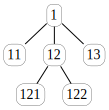

In [ ]:
# uso di liblet per ottenre una rappresentazione grafica 

from liblet import Tree

t = Tree.from_lol(tree)
t

## Visite

* preordine, 
* postordine, 
* per livello.

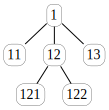

In [ ]:
def preorder(tree, visitor):
    root, *children = tree
    visitor(root)
    for st in children: preorder(st, visitor)
        
t        

In [ ]:
preorder(tree, print)

1
11
12
121
122
13


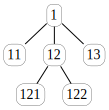

In [ ]:
def postorder(tree, visitor):
    root, *children = tree
    for st in children: postorder(st, visitor)
    visitor(root)
    
t    

In [ ]:
postorder(tree, print)

11
121
122
12
13
1


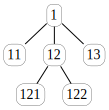

In [ ]:
# per livelli

from collections import deque # https://docs.python.org/3.7/tutorial/datastructures.html#using-lists-as-queues

def levelorder(tree, visitor):

    Q = deque()
    add = Q.append
    remove = Q.popleft
    
    add(tree)
    while Q:
        tree = remove()
        root, *children = tree
        visitor(root)
        for s in children: add(s)
t

In [ ]:
levelorder(tree, print)

1
11
12
13
121
122


# Grafi

Per i grafi sono usuali due rappresentazioni: per *archi* (dappresentati da `tuple` di `tuple`) e tramite la relazione di *adiacenza* (rappresentata da un `dict` di `tuple`).

In [ ]:
arcs = (
    (1, 2), 
    (1, 4),
    (2, 3), 
    (3, 2), 
    (3, 4), 
    (3, 5)
)

adjacency = {
    1: {2, 4},
    2: {3},
    3: {2, 4, 5},
    4: set(),
    5: set()
}

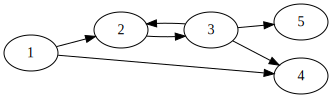

In [ ]:
# uso di liblet per ottenre una rappresentazione grafica 

from liblet import Graph

g = Graph(arcs)
g

## <span style='color: red;'>Esercizio per casa</span>

Scrivete il corpo delle due funzioni seguenti: la prima converte la rappresentazione per adiacenza in quella per archi, la seconda il viceversa.

In [ ]:
def adjacency2arcs(adjacency):
    arcs = []
    # scrivete qui il vostro codice
    return tuple(arcs)

def arcs2adjacency(arcs):
    adjacency = dict()
    # scrivete qui il vostro codice
    return adjacency

In [ ]:
# se il codice funziona, questa cella e la prossima devono restituire True

sorted(adjacency2arcs(adjacency)) == sorted(arcs)

False

In [ ]:
arcs2adjacency(arcs) == adjacency

False

## Visite

* ampiezza,
* profondità.

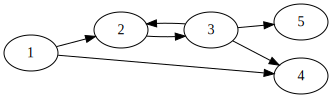

In [ ]:
# una versione ricorsiva 

def depthfirst(adjacency, start, visit):
    def walk(src):
        visit(src)
        seen.add(src)
        for dst in adjacency[src]:
            if dst not in seen: 
                walk(dst)
    seen = set()
    walk(start)

g    

In [ ]:
depthfirst(adjacency, 1, print)

1
2
3
4
5


In [ ]:
# versione iterativa (basata su coda, simile a levelorder)

from collections import deque

def breadthfirst(adjacency, start, visit):
    
    Q = deque()
    add = Q.append
    remove = Q.popleft
    
    seen = set()
    add(start)
    while Q:
        src = remove()
        visit(src)
        seen.add(src)
        for dst in adjacency[src]:
            if dst not in seen:
                add(dst)

In [ ]:
breadthfirst(adjacency, 1, print)

1
2
4
3
5


## <span style='color: red;'>Esercizio per casa</span>

Scrivete una versione iterativa (basata su uno *stack*, che in Python potete scrivere ispirandovi alla cella seguente) della visita in profondità.

In [ ]:
# uno stack (LIFO) in Python

S = deque()
push = S.append
pop = S.pop

for e in 'un', 'due', 'tre': push(e)
    
while S:
    print(pop())

tre
due
un
